In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
x_0 = tf.random.normal([20], 3, 1)
x_1 = tf.random.normal([20], 5, 1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

x = tf.concat([x_0, x_1], axis=0)
y = tf.concat([y_0, y_1], axis=0)

In [9]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8, 6))

    if str_title is not None:
        plt.title(str_title, fontsize=20, pad=20)
    plt.plot(X, Y, ls='none', marker='x')

    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)

    plt.tick_params(axis='both', labelsize=14)

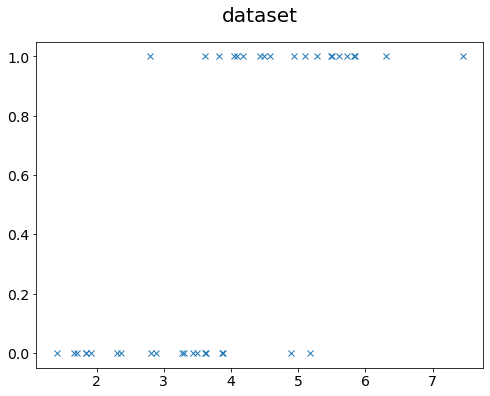

In [10]:
plot_graph(x, y, str_title='dataset')

In [16]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_sum(y_true*tf.math.log(y_pred)+(1-y_true)*tf.math.log(1-y_pred))

In [20]:
lr = 0.001
optimizer = tf.optimizers.SGD(lr)


def run_optimization():
    with tf.GradientTape() as g:
        pred = 1 / (1 + tf.exp(-1 * (W * x + b)))
        loss = cross_entropy(pred, y)

    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W,b]))

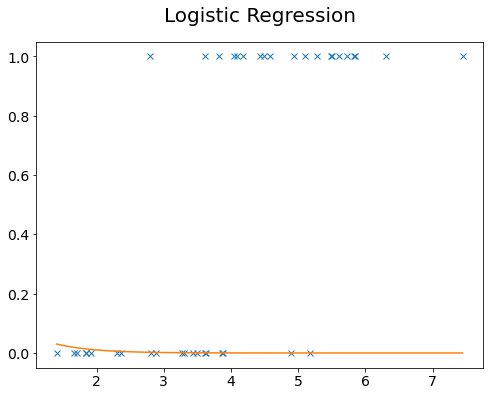

In [21]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1 / (1 + tf.exp(-1 * (W * x_fl + b))), str_title='Logistic Regression')

In [30]:
training_steps = 1000
display_step = 100
for step in range(1, training_steps + 1):
    run_optimization()

    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)

        print("step : ", step, ", loss : ", loss.numpy())
    end_step = step

step :  100 , loss :  16.406097
step :  200 , loss :  16.336067
step :  300 , loss :  16.271927
step :  400 , loss :  16.213066
step :  500 , loss :  16.158932
step :  600 , loss :  16.109062
step :  700 , loss :  16.06303
step :  800 , loss :  16.020477
step :  900 , loss :  15.981079
step :  1000 , loss :  15.944546


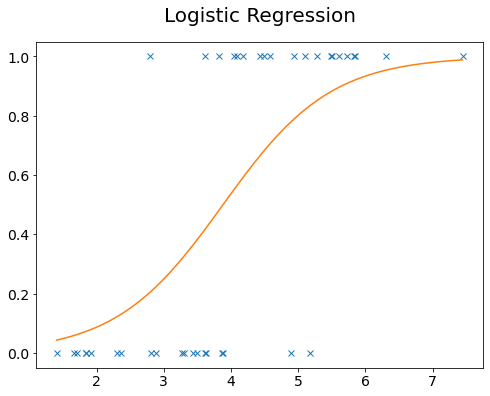

In [31]:
plot_graph(x, y, X_hat=x_fl, Y_hat=1 / (1 + tf.exp(-1 * (W * x_fl + b))), str_title='Logistic Regression')

step :  24100 , loss :  15.365726
step :  24200 , loss :  15.365725
step :  24300 , loss :  15.365725
step :  24400 , loss :  15.365723
step :  24500 , loss :  15.365723
step :  24600 , loss :  15.365721
step :  24700 , loss :  15.365721
step :  24800 , loss :  15.365719
step :  24900 , loss :  15.365718
step :  25000 , loss :  15.365719
step :  25100 , loss :  15.365717
step :  25200 , loss :  15.365715
step :  25300 , loss :  15.365715
step :  25400 , loss :  15.365715
step :  25500 , loss :  15.365714
step :  25600 , loss :  15.365711
step :  25700 , loss :  15.365709
step :  25800 , loss :  15.365709
step :  25900 , loss :  15.365709
step :  26000 , loss :  15.365709
step :  26100 , loss :  15.365709
step :  26200 , loss :  15.365709
step :  26300 , loss :  15.365708
step :  26400 , loss :  15.365706
step :  26500 , loss :  15.3657055
step :  26600 , loss :  15.365707
step :  26700 , loss :  15.3657055
step :  26800 , loss :  15.365704
step :  26900 , loss :  15.3657055
step :  270

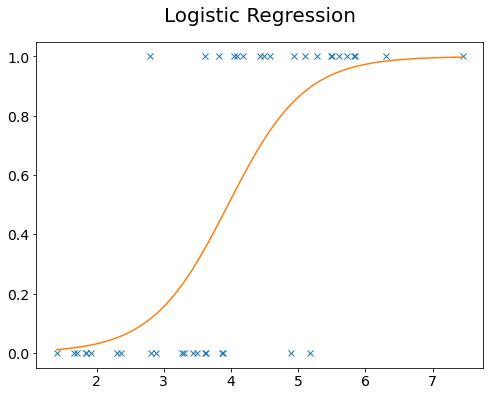

In [37]:
training_steps = 10000
display_step = 100
lr = 0.05
for step in range(end_step + 1, training_steps + end_step + 1):
    run_optimization()

    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)

        print("step : ", step, ", loss : ", loss.numpy())
    end_step = step
plot_graph(x, y, X_hat=x_fl, Y_hat=1 / (1 + tf.exp(-1 * (W * x_fl + b))), str_title='Logistic Regression')